# Part 2
## Contents

1. [libraries and files](#libraries)
2. [Importing data](#import)
3. [Viewing the class in balance](#inbalance)
4. [KNN](#KNN)

## Libraries
<a id='libraries'></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold #Something to split and randomise the data 

from sklearn.neighbors import KNeighborsClassifier #Importing knn model

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Importing data and sorting them
<a id='import'></a>

In [2]:
data = pd.read_csv('Credit/creditdefault_train.csv') #Putting the test data and the train data in data frames 
test = pd.read_csv('Credit/creditdefault_test.csv')

#Seperating the train data labels from the inputs:
y_train = data['Y']
x_train = data.drop(['Y'],axis=1)

#Seperating the test data labels from the inputs:
y_test = test['Y']
x_test = test.drop(['Y'],axis=1)

kf = StratifiedKFold(n_splits=4)
#kf = KFold(15000, n_folds=3)



## Viewing the class in balance
<a id='libraries'></a>

In [3]:
def inbalance(y,classes):
    '''A function that displays the difference in classes in bar graph form'''
    num_classes = np.zeros(len(classes)) # A place to tally all the classes
    for i in range(len(y)):
        num_classes[y[i]] += 1
        
    for i in range(len(classes)):
        print('The total number in class ' + classes[i] + ' is ' + str(num_classes[i]))
    plt.bar(x=classes,height=num_classes) # plotting bar graph
    

### Train data

The total number in class No is 11682.0
The total number in class Yes is 3318.0


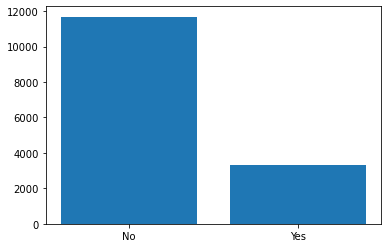

In [4]:
inbalance(y_train,['No','Yes'])

### Test data 

The total number in class No is 11682.0
The total number in class Yes is 3318.0
15000


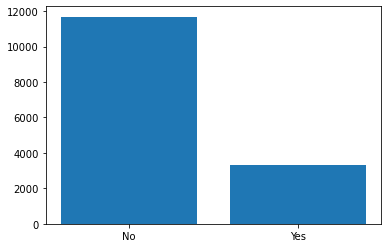

In [5]:
inbalance(y_test,['No','Yes'])
print(len(y_test))

### Conclusions
Because the data has a large class inbalance the metrics used will be sensitive to defualts rather than payments which means I will use precision, recall with respect to each class but with a focus on defulters

## KNN
<a id='KNN'></a>

## Manhatten distance

In [14]:
def metricsGraphknn(default_prec, pay_prec, acc, default_f, pay_f, parameters):
    word = ['Default Precision','Payed Precision','Accuracy Score','F score default','F score pay']
  
    print('The maximum Default Precision: ' + str(np.amax(default_prec)))
    print('The maximum Payed Precision: ' + str(np.amax(pay_prec)))
    print('The maximum Accuracy Score: ' + str(np.amax(acc)))  
    print('The maximum F score default: ' + str(np.amax(default_f)))  
    print('The maximum F score pay: ' + str(np.amax(pay_f)))  
    
    
    figure,axis = plt.subplots(5,1,figsize=(15,20))
    
   
    axis[0].plot(range(1,parameters[0]),default_prec)
    axis[0].set_title('Default Precision')
    
    axis[1].plot(range(1,parameters[0]),pay_prec)
    axis[1].set_title('Payed Precision')
    
    axis[2].plot(range(1,parameters[0]),acc)
    axis[2].set_title('Accuracy Score')
    
    axis[3].plot(range(1,parameters[0]),default_f)
    axis[3].set_title('F score default')
    
    axis[4].plot(range(1,parameters[0]),pay_f)
    axis[4].set_title('F score pay')
    


In [6]:
#Place to store the mean of testing on the fold
default_prec_man = []
pay_prec_man = []
acc_man = []
default_f_measure_man = []
pay_f_measure_man = []


for k in range(1,31): #The K nearest neigbours
    #Place to store the raw outputs
    av_prec_default = []
    av_pay_prec = []
    av_acc = []
    av_f_default = []
    av_f_pay = []
    
    
    for train_index, test_index in kf.split(x_train,y_train):# Splitting into three folds
        #Taking the elements and putting them into array
        temp_train_x = np.take(x_train,train_index,0)
        temp_train_y = np.take(y_train,train_index,0)

        temp_test_x = np.take(x_train,test_index,0)
        temp_test_y = np.take(y_train,test_index,0)
    
        knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan') #Building the model
        knn.fit(temp_train_x,temp_train_y)#Training model
        
        prediction = knn.predict(temp_test_x)#Working out predictions
        
        #Storing the output metrics
        av_prec_default.append(precision_score(temp_test_y,prediction))
        av_pay_prec.append(precision_score(temp_test_y,prediction,pos_label=0))
        av_acc.append(accuracy_score(temp_test_y,prediction))
        av_f_default.append(f1_score(temp_test_y,prediction))
        av_f_pay.append(f1_score(temp_test_y,prediction,pos_label=0))
        
    #Finding the mean from the storing in the internal loop and storing it to be represented in the graph
    default_prec_man.append(np.mean(av_prec_default))
    pay_prec_man.append(np.mean(av_pay_prec))
    acc_man.append(np.mean(av_acc))
    default_f_measure_man.append(np.mean(av_f_default))
    pay_f_measure_man.append(np.mean(av_f_pay))
    

    


[0.3038600401668838, 0.1624853939518631, 0.2666778636571231, 0.1630874171029958, 0.2367163561775938, 0.16291185421626136, 0.22619093978063615, 0.14919009127377827, 0.21390212449807355, 0.15163143331028106, 0.19446862525095915, 0.1458579197317025, 0.18487491379343782, 0.14169885018168119, 0.1727132201581366, 0.1389073752284529, 0.16951584479540296, 0.13974509425776513, 0.16242874334073645, 0.13298835440768175, 0.1600998266858241, 0.1305523163028281, 0.148797771030135, 0.12534018838205774, 0.1398828241986158, 0.11789544326772933, 0.1306807839087203, 0.11135368392266322, 0.128498548004097, 0.1101434682541262]


The maximum Default Precision: 0.5029981698870728
The maximum Payed Precision: 0.8023783323714061
The maximum Accuracy Score: 0.7786666666666666
The maximum F score default: 0.5029981698870728
The maximum F score pay: 0.8735629005751724


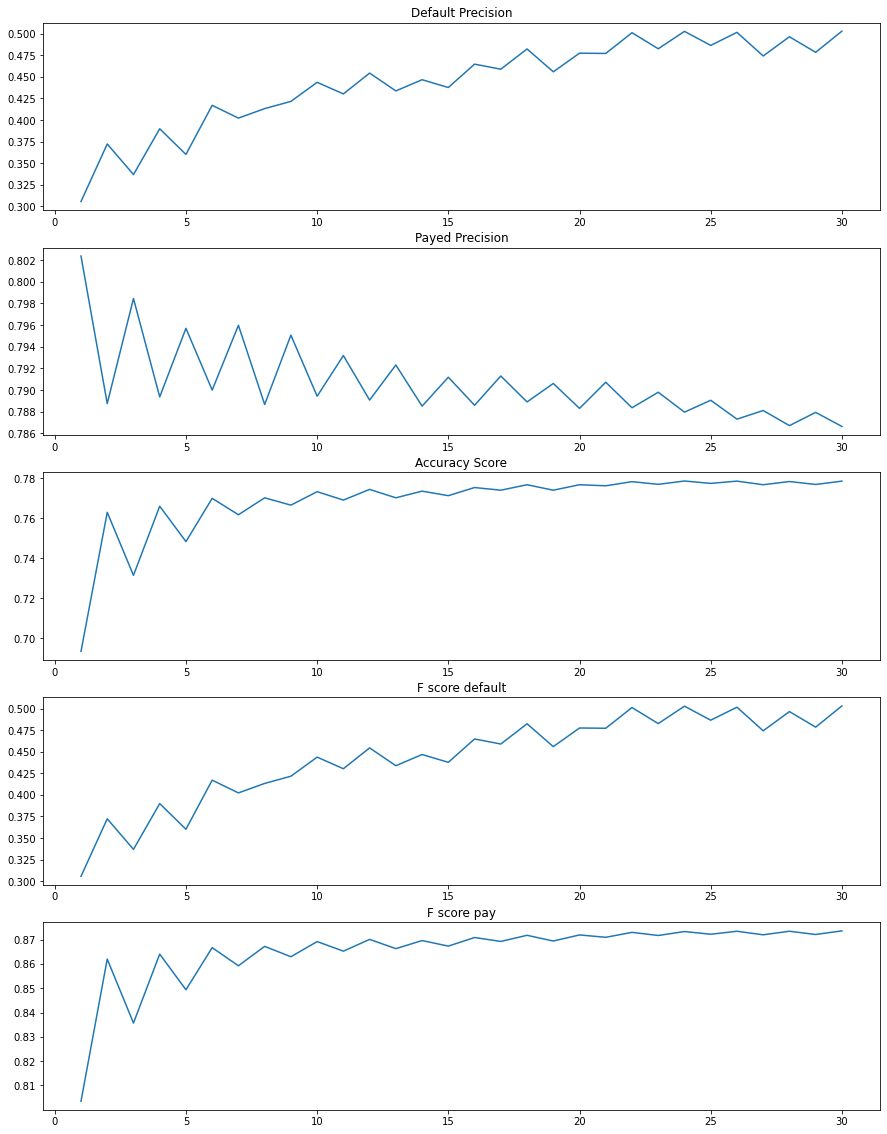

In [15]:
metricsGraphknn(default_prec_man,pay_prec_man,acc_man,default_prec_man,pay_f_measure_man,[31])


## Euclidean

In [12]:
#Place to store the mean of testing on the fold
default_prec_euc = []
pay_prec_euc = []
acc_euc = []
default_f_measure_euc = []
pay_f_measure_euc = []


for k in range(1,31): #The K nearest neigbours
    #Place to store the raw outputs
    av_prec_default = []
    av_pay_prec = []
    av_acc = []
    av_f_default = []
    av_f_pay = []
    
    
    for train_index, test_index in kf.split(x_train,y_train):# Splitting into three folds
        #Taking the elements and putting them into array
        temp_train_x = np.take(x_train,train_index,0)
        temp_train_y = np.take(y_train,train_index,0)

        temp_test_x = np.take(x_train,test_index,0)
        temp_test_y = np.take(y_train,test_index,0)
    
        knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean') #Building the model
        knn.fit(temp_train_x,temp_train_y)#Training model
        
        prediction = knn.predict(temp_test_x)#Working out predictions
        
        #Storing the output metrics
        av_prec_default.append(precision_score(temp_test_y,prediction))
        av_pay_prec.append(precision_score(temp_test_y,prediction,pos_label=0))
        av_acc.append(accuracy_score(temp_test_y,prediction))
        av_f_default.append(f1_score(temp_test_y,prediction))
        av_f_pay.append(f1_score(temp_test_y,prediction,pos_label=0))
        
    #Finding the mean from the storing in the internal loop and storing it to be represented in the graph
    default_prec_euc.append(np.mean(av_prec_default))
    pay_prec_euc.append(np.mean(av_pay_prec))
    acc_euc.append(np.mean(av_acc))
    default_f_measure_euc.append(np.mean(av_f_default))
    pay_f_measure_euc.append(np.mean(av_f_pay))
    

    


The maximum Default Precision: 0.4889212987947472
The maximum Payed Precision: 0.8003249384066574
The maximum Accuracy Score: 0.7776
The maximum F score default: 0.4889212987947472
The maximum F score pay: 0.8730052872961145


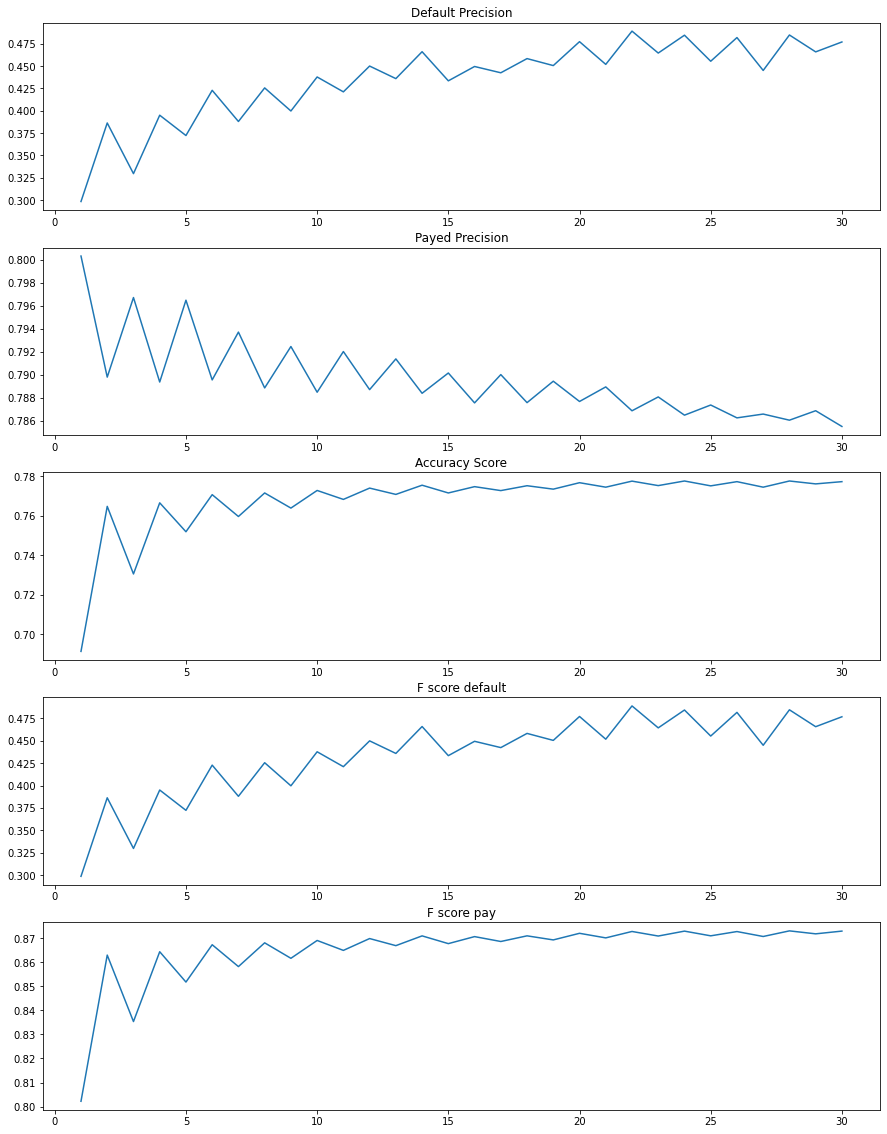

In [16]:
metricsGraphknn(default_prec_euc,pay_prec_euc,acc_euc,default_prec_euc,pay_f_measure_euc,[31])

## Conclusions
The manhattan distance is a better because of its precision with detecting defaults being 2% higher than the euclideans best model and this is not at a large penalty of the precision score for the payed which is only